In [1]:
import pandas as pd
data = pd.read_csv("/home/leong/Desktop/Drug overdose death rates/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")
data

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,1999,1,All ages,1.10,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2000,2,All ages,1.10,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2001,3,All ages,1.10,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2002,4,All ages,1.10,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2003,5,All ages,1.10,8.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 45-54 years,3.25,2018,20,45-54 years,1.60,3.4,NaN
6224,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3.26,2018,20,55-64 years,1.70,2.3,NaN
6225,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 65-74 years,3.27,2018,20,65-74 years,1.80,0.4,NaN
6226,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.28,2018,20,75-84 years,1.90,NaN,*


In [2]:
data.isnull().sum()

INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE          1111
FLAG              5117
dtype: int64

Cleaning the data

In [8]:
#Interpolate the values of the "ESTIMATE" column
data['ESTIMATE'] = data['ESTIMATE'].interpolate()

#drop "FLAG" Column
data = data.drop('FLAG', axis=1)

Data Visualizations

Statistical Description

In [25]:
# Summary statistics
summary_stats = data.describe()
summary_stats


,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000
mean,2.500000,1.578035,3.028902,3.383006,2008.664740,10.664740,1.354913,4.257643
std,1.707962,0.493913,1.447036,1.526819,5.849512,5.849512,0.301459,6.023462
min,0.000000,1.000000,0.000000,0.100000,1999.000000,1.000000,1.100000,0.000000
25%,1.000000,1.000000,2.000000,2.100000,2004.000000,6.000000,1.100000,0.700000
50%,2.500000,2.000000,3.000000,3.220000,2009.000000,11.000000,1.200000,1.800000
75%,4.000000,2.000000,4.000000,4.600000,2014.000000,16.000000,1.600000,5.100000
max,5.000000,2.000000,5.000000,5.930000,2018.000000,20.000000,1.910000,54.300000


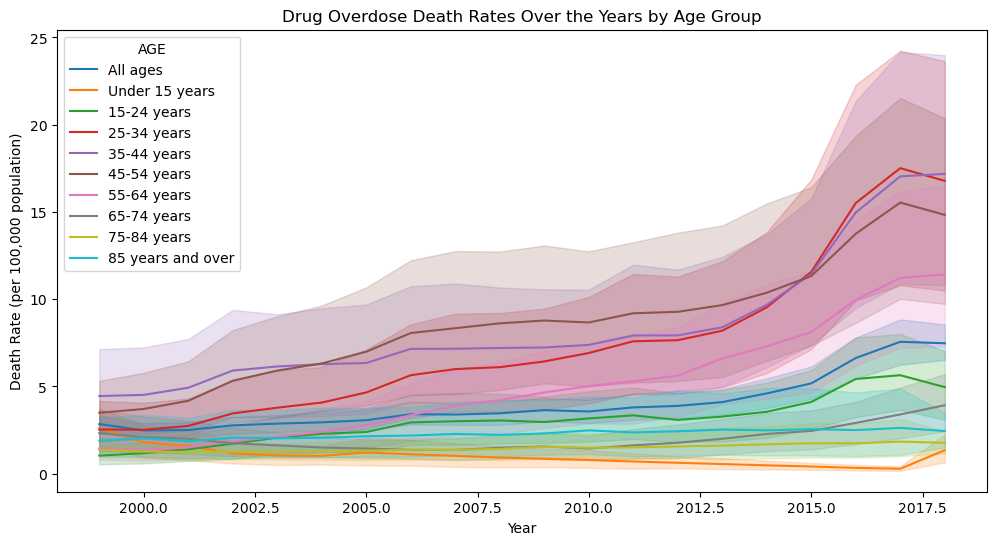

In [10]:
#plot of drug overdose death rates over the years
import matplotlib.pyplot as plt
import seaborn as sns

#Line plot 
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='ESTIMATE', data=data, hue='AGE')
plt.title('Drug Overdose Death Rates Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.show()

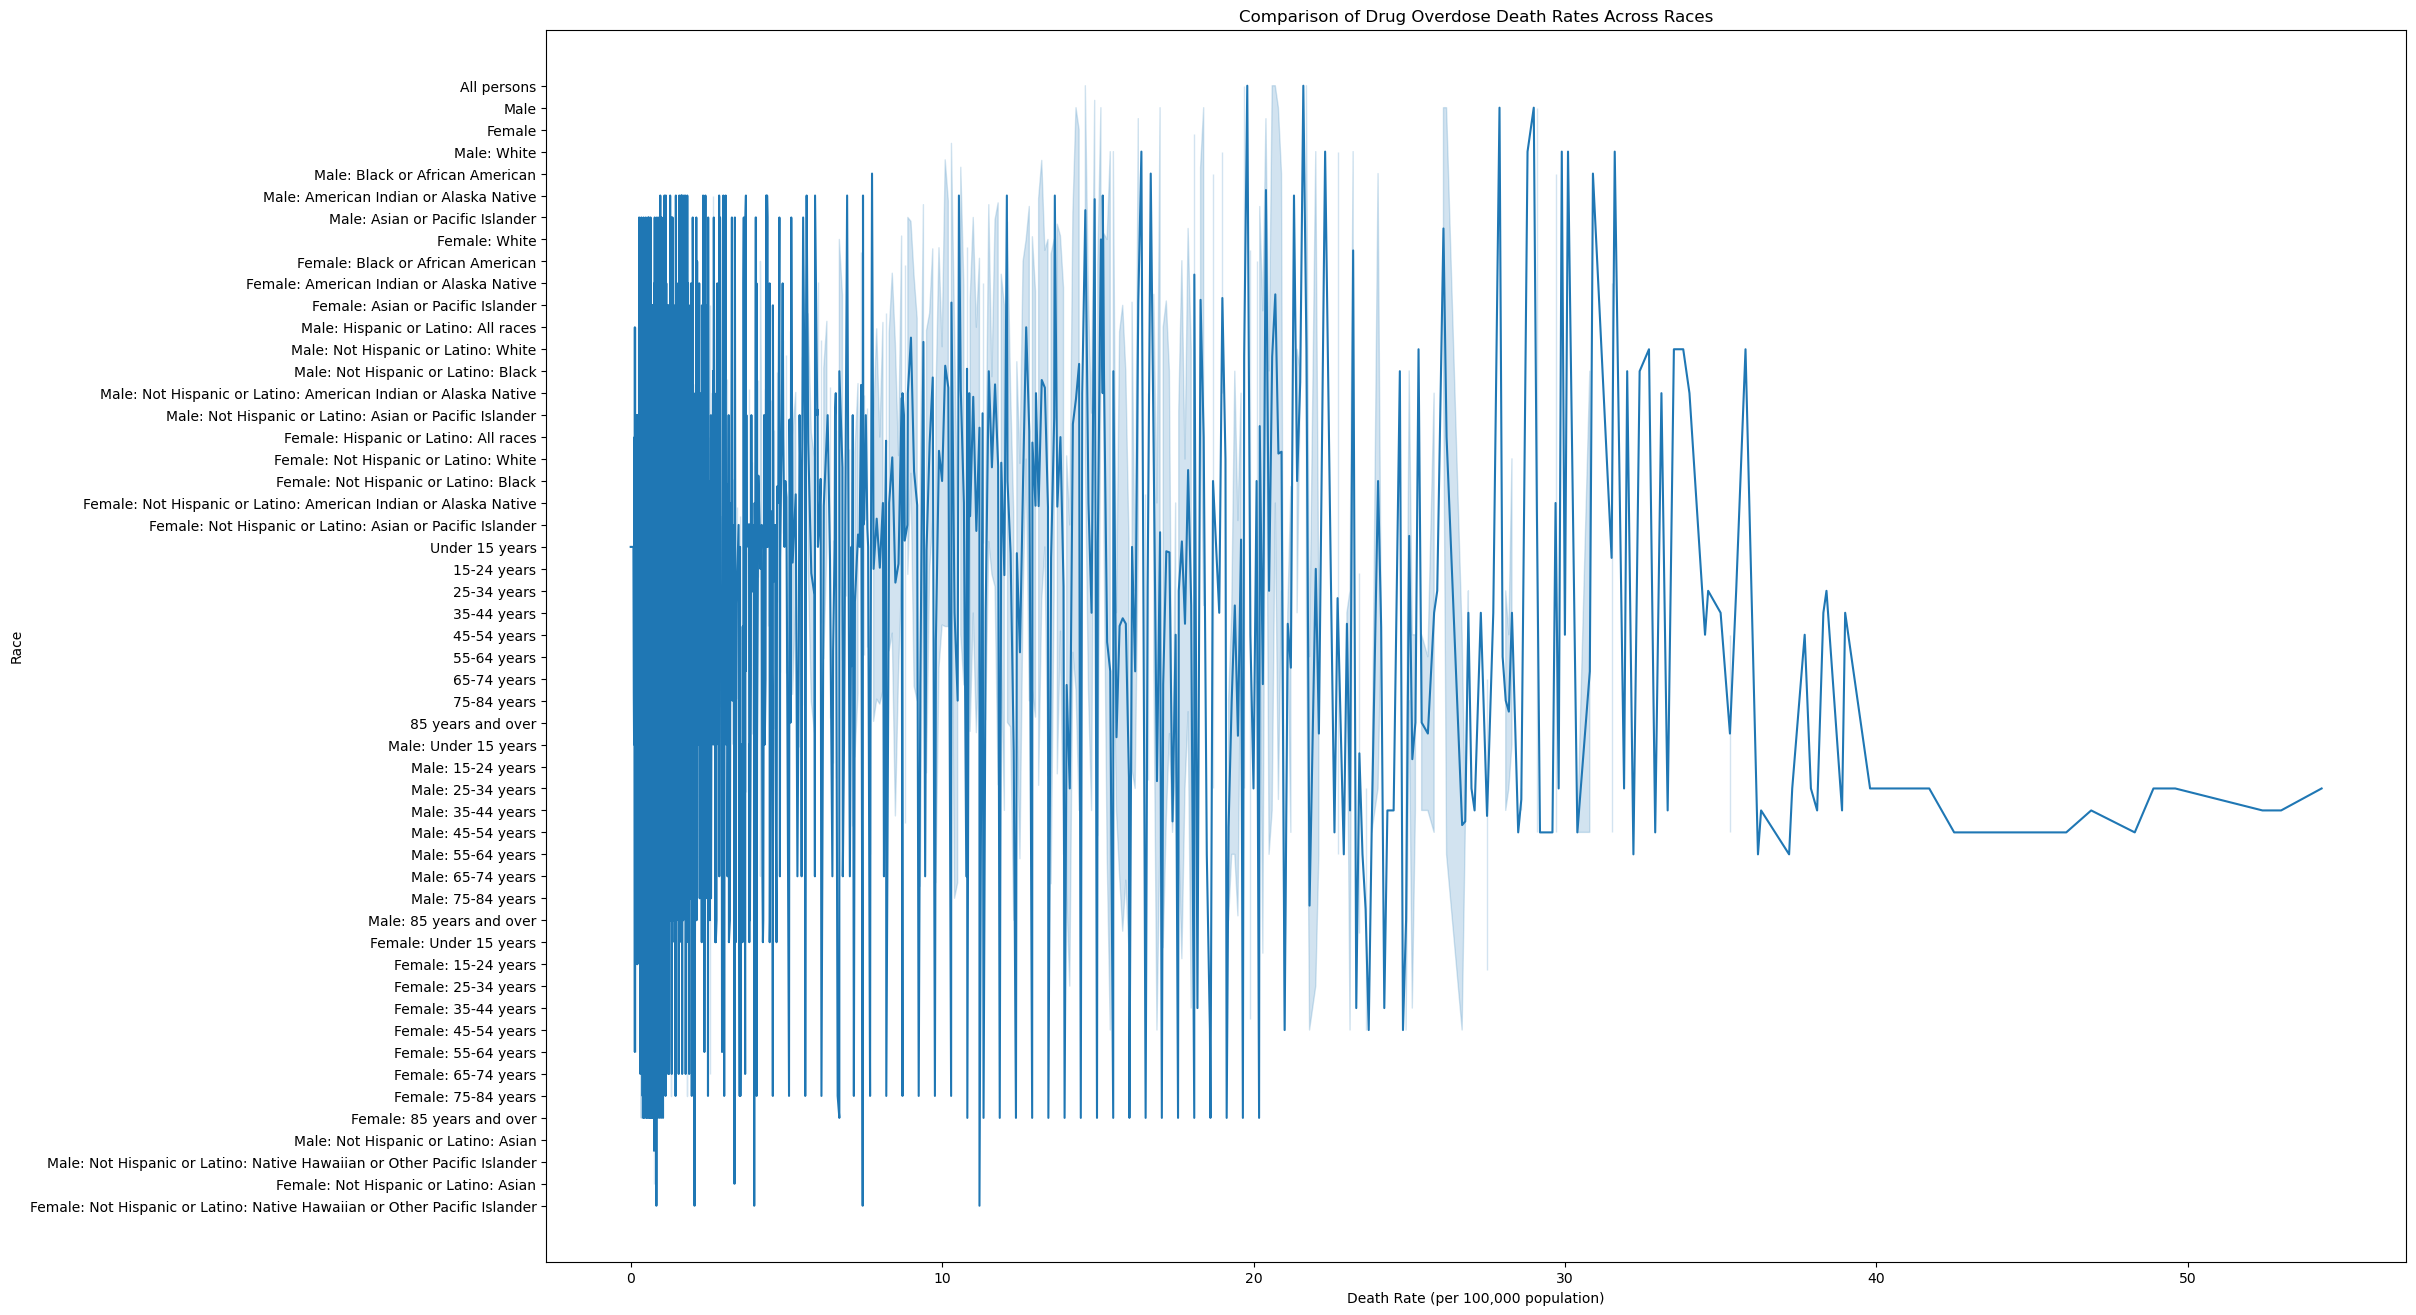

In [22]:
#race-wise death rates comparison
plt.figure(figsize=(24, 16))
sns.lineplot(x='ESTIMATE', y='STUB_LABEL', data=data)
plt.title('Comparison of Drug Overdose Death Rates Across Races')
plt.xlabel('Death Rate (per 100,000 population)')
plt.ylabel('Race')
plt.show()

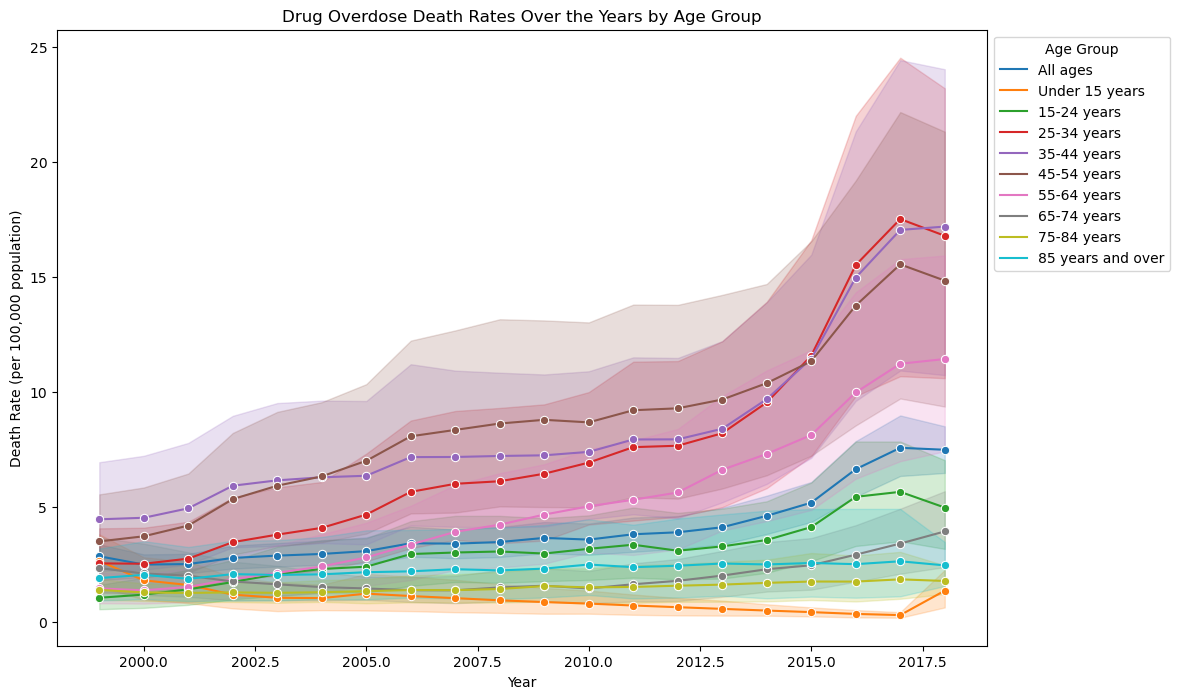

In [11]:
#age-wise plot

plt.figure(figsize=(12, 8))
sns.lineplot(x='YEAR', y='ESTIMATE', hue='AGE', data=data, marker='o')
plt.title('Drug Overdose Death Rates Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

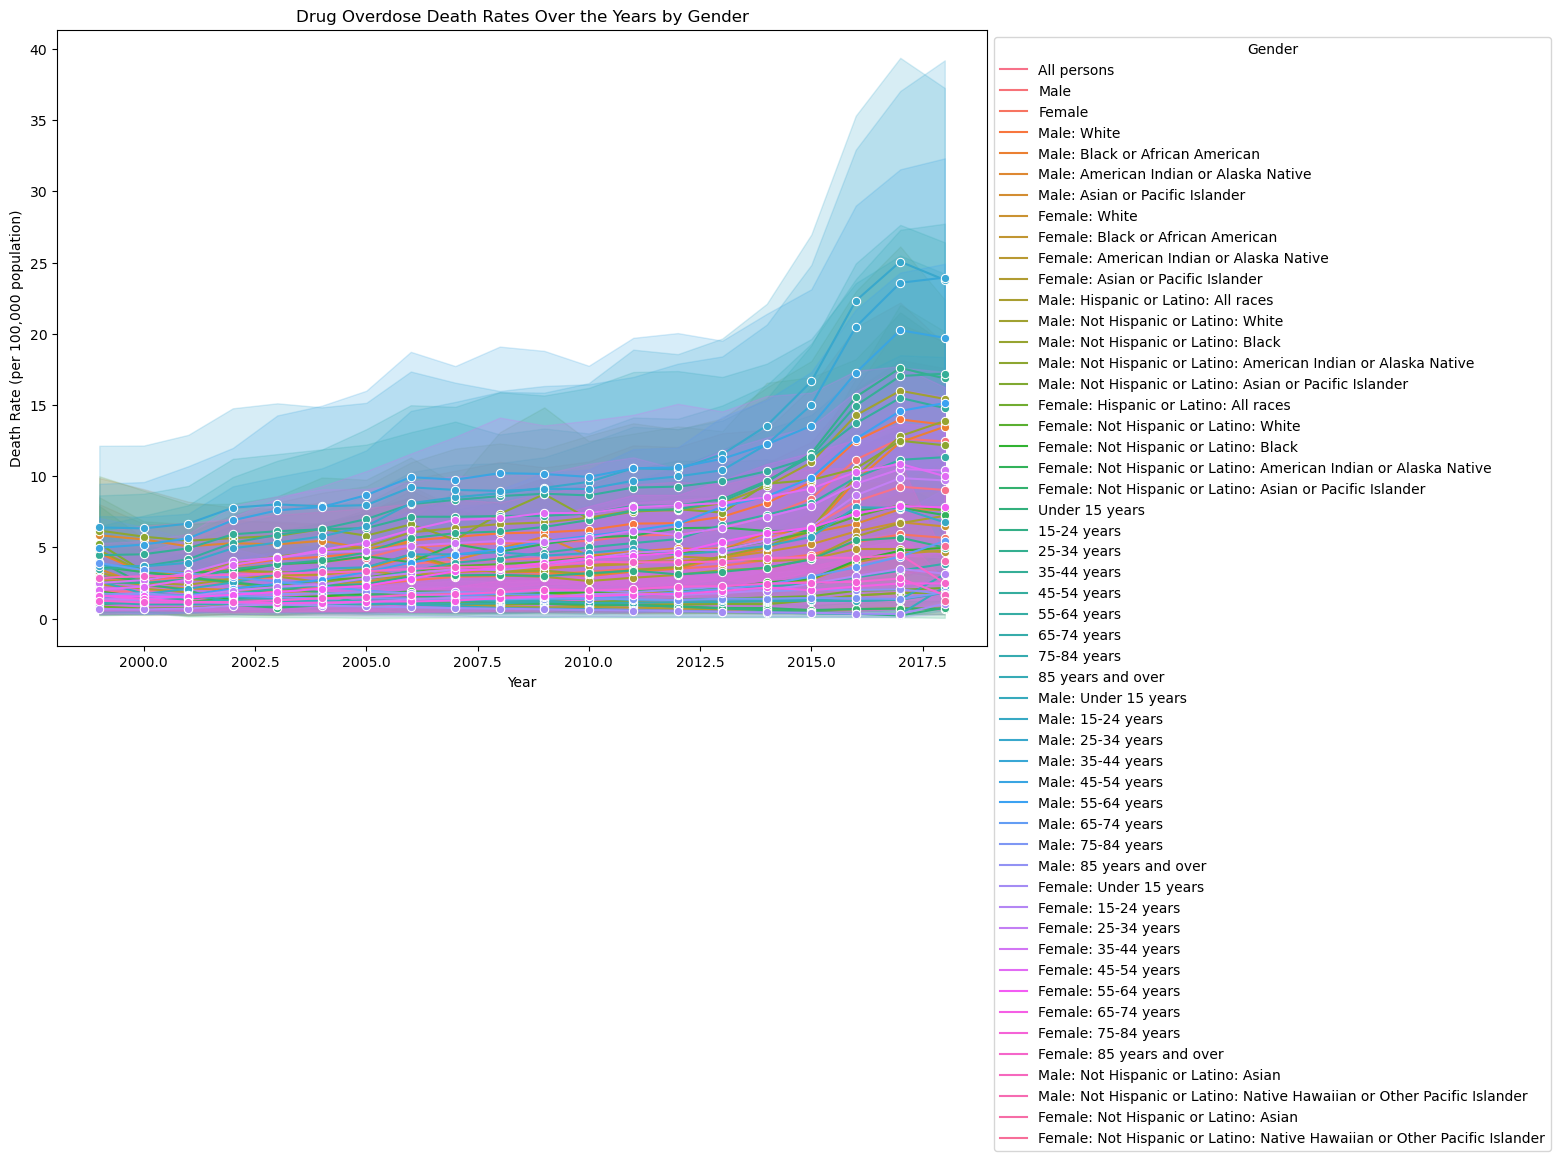

In [14]:
# Line plot of gender_wise death rates

plt.figure(figsize=(12, 8))
sns.lineplot(x='YEAR', y='ESTIMATE', hue='STUB_LABEL', data=data, marker='o')
plt.title('Drug Overdose Death Rates Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


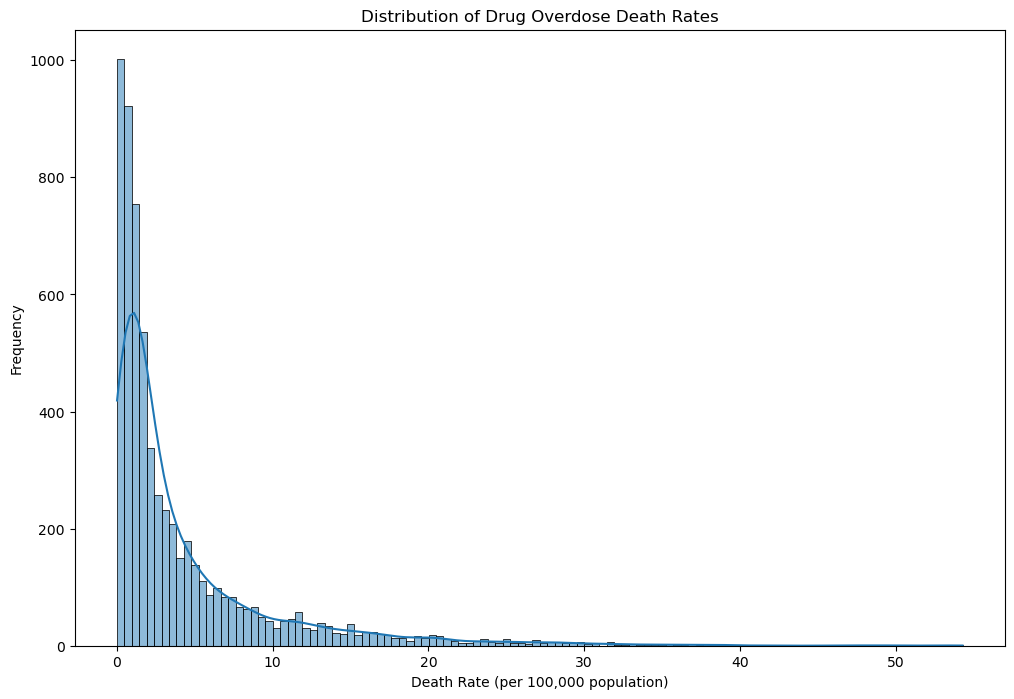

In [19]:
# Distribution plot of drug overdose death rates
plt.figure(figsize=(12, 8))
sns.histplot(data['ESTIMATE'], kde=True)
plt.title('Distribution of Drug Overdose Death Rates')
plt.xlabel('Death Rate (per 100,000 population)')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_7194/4219265596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


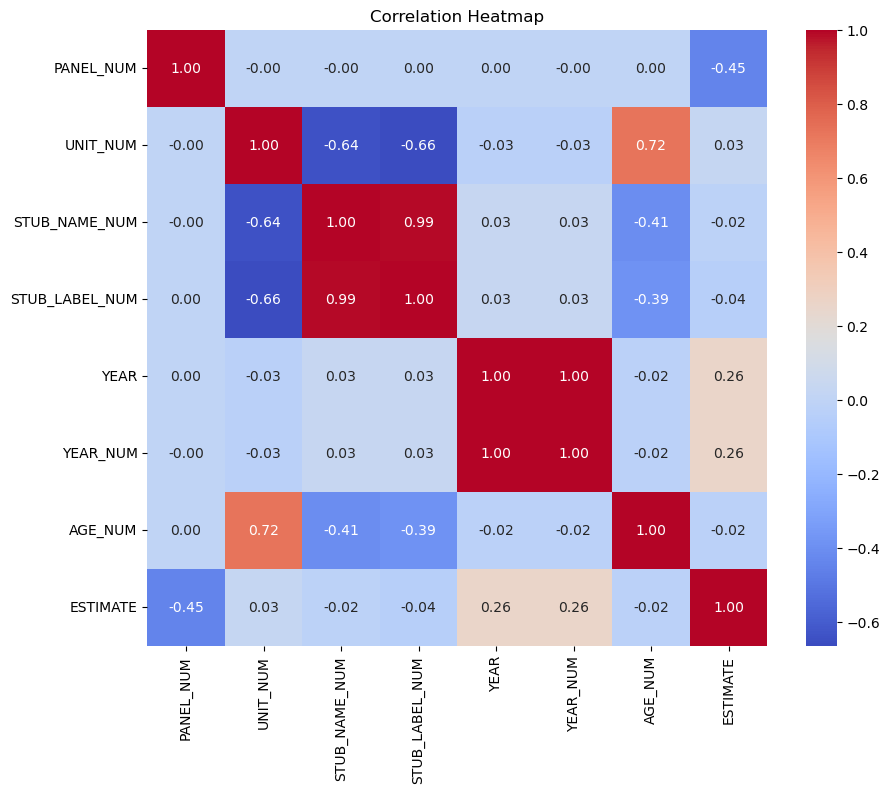

In [29]:
correlation_matrix = data.corr()

#heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()